In [2]:
import numpy as np
import scipy.stats as sts
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import random

1. Независимые случайные величины 𝑋, 𝑌, 𝑍 могут принимать только целые 
значения: 𝑋 – от 0 до 12 c вероятностью 1/13 , 𝑌 – от 0 до 13 с вероятностью 1/14 , 
а 𝑍 только значения 3 и 7, при этом 𝑃 (𝑍 = 3) = 9/10 . Найдите: a) вероятность 
того, что сумма данных случайных величин будет равна 12 и доказать ее 
статистическую устойчивость, построив график зависимости относительной 
частоты указанного события от числа экспериментов; б) наиболее вероятное 
значение суммы X +Y +Z и вероятность такого события; в) распределение X + Y + 
Z.

In [2]:
xi = np.arange(12 + 1)
yj = np.arange(13 + 1)
zk =[3, 7]

In [3]:
px=[1/13 for i in range(0, 13)]
py=[1/14 for i in range(0, 14)]
pz=[9/10, 1/10]

In [14]:
X = sts.rv_discrete(name='X', values=(xi, px))
Y = sts.rv_discrete(name='Y', values=(yj, py))
Z = sts.rv_discrete(name='Z', values=(zk, pz))
X

In [49]:
# а)

Prob_a = 0

for i in range(0, 13):
    for j in range(0, 14):
     for k in range(0, 2):
         if xi[i] + yj[j] + zk[k] == 12:
             Prob_a += X.pmf(xi[i]) * Y.pmf(yj[j]) * Z.pmf(zk[k])

Prob_a

0.05274725274725277

In [38]:
r=[]
PP=[]

for m in range(3, 33):
    P = 0
    
    for i in range(0, 13):
        for j in range(0, 14):
            for k in range(0, 2):
                if xi[i] + yj[j] + zk[k] == m:
                    P += X.pmf(xi[i]) * Y.pmf(yj[j]) * Z.pmf(zk[k])
    r.append(m)
    PP.append(P)

In [40]:
R=sts.rv_discrete(name='R', values=(r, PP))

In [41]:
N=10000
x=[]
y=[]

for i in range(10, N + 1):
    x.append(i)
    RR = list(R.rvs(size=i))
    y.append(RR.count(12)/i)

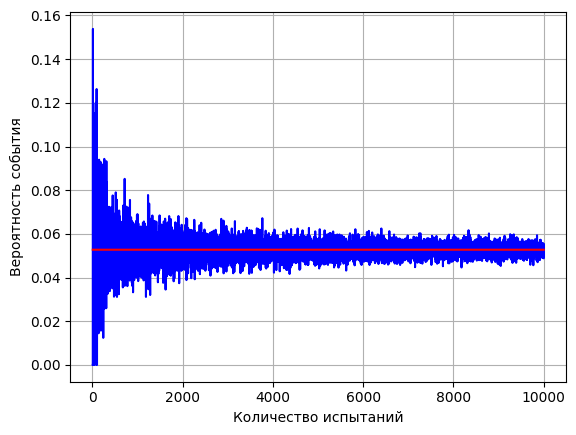

In [43]:
def plot_(x, y):
    plt.plot(x, y, color = 'b')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность события')
    plt.grid()
    plt.plot(x, [Prob_a] * len(x), color = 'r')
    plt.show()


plot_(x, y)

In [44]:
# б)

P_b = 0

for i in range(0, 13):
    for j in range(0, 14):
        for k in range(0, 2):
            if xi[i] + yj[j] + zk[k] == 16:
                P_b += X.pmf(xi[i]) * Y.pmf(yj[j]) * Z.pmf(zk[k])
P_b

0.0697802197802198

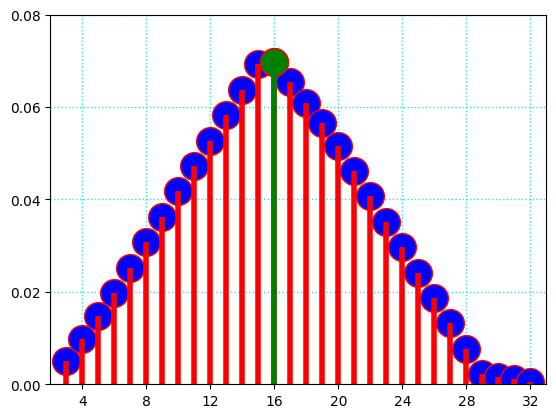

In [48]:
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.02))
plt.ylim(0,0.08)
plt.xlim(2,33)
plt.grid(color='DarkTurquoise', alpha=0.75, linestyle=':', linewidth=1)
ax.plot(r, R.pmf(r), 'bo', ms=20, mec='r')
ax.vlines(r, 0, R.pmf(r), colors='r', lw=4)
ax.plot(16, R.pmf(16), 'go', ms=20, mec='r')
ax.vlines(16, 0, R.pmf(16), colors='g', lw=4)
plt.show()

3. Независимые случайные величины X, Y, Z принимают только целые значения: 
X – от 1 до 13 с вероятностью, пропорциональной принимаемому целому значению, 
т.е. P (X = i) = A · i, i = 1, . . . , 13; Y – от 1 до 12 с вероятностью также 
пропорционально принимаемому значению P (Y = j) = B · j, j = 1, . . . , 12; 
Z – от 1 до 8 с вероятностью P (Z = k) = C · k, k = 1, . . . , 8. Найдите вероятность 
того, что 𝑋, 𝑌, 𝑍 примут разные значения, т.е. 𝑃 (𝑋 ≠ 𝑌, 𝑋 ≠ 𝑍, 𝑌 ≠ 𝑍) и доказать 
ее статистическую устойчивость, построив график зависимости относительной 
частоты указанного события от числа экспериментов. 

In [177]:
xi = list(range(1, 13 + 1))
yj = list(range(1, 12 + 1))
zk = list(range(1, 8 + 1))

px = [2 * i / (13 * (13 + 1)) for i in range(1, 13 + 1)]
py = [2 * i / (12 * (12 + 1)) for i in range(1, 12 + 1)]
pz = [2 * i / (8 * (8 + 1)) for i in range(1, 8 + 1)]

X = sts.rv_discrete(name='X', values=(xi, px))
Y = sts.rv_discrete(name='Y', values=(yj, py))
Z = sts.rv_discrete(name='Z', values=(zk, pz))

P_3 = 0
for i in range(13):
    for j in range(12):
        for k in range(8):
            if xi[i] != yj[j] and xi[i] != zk[k] and yj[j] != zk[k]:
                P_3 += X.pmf(xi[i]) * Y.pmf(yj[j]) * Z.pmf(zk[k])

P_3

0.7836479759556683

In [200]:
def stat_prob_3(N):
    M = 0
    x__ = []
    y__ = []
    
    for i in range(1, N + 1):
        x_ = random.choice(xi)
        y_ = random.choice(yj)
        z_ = random.choice(zk)
        
        if x_ != y_ and x_ != z_ and y_ != z_:
            M += 1
            x__.append(i)
            y__.append(M / i)
    
    return M / N, x__, y__

p_3_stat, x, y = stat_prob_3(10000)
p_3_stat

0.7767

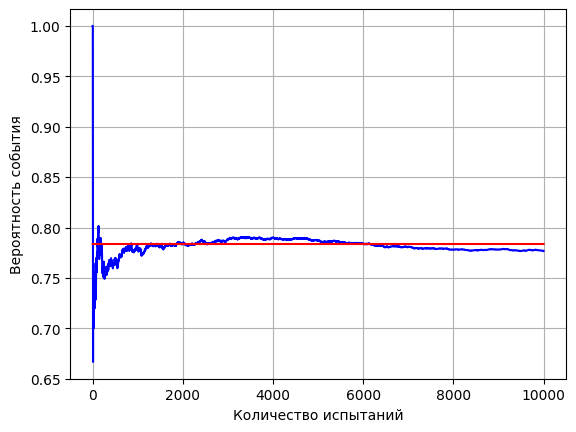

In [201]:
def plot_(x, y):
    plt.plot(x, y, color = 'b')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность события')
    plt.grid()
    plt.plot(x, [P_3] * len(x), color = 'r')
    plt.show()


plot_(x, y)

4. Независимые дискретные случайные величины X1, X2, . . . , X40 принимают 
только положительные или отрицательные значения, при этом P(Xi > 0) = 0, 98 для 
всех Xi (i = 1, 2, . . . , 40). Найдите P(X1X2 · · · X40 > 0) и доказать ее статистическую 
устойчивость, построив график зависимости относительной частоты указанного 
события от числа экспериментов.

Можно решить задачу с использованием itertools.product([-1, 1], repeat=40), однако код будет выполняться очень долго, памяти ПК может и вовсе не хватить, поэтому не будем считать "в лоб".

In [275]:
count_comb = [[math.comb(40, i), i] for i in range(0, 41, 2)] # Когда произведение будет > 0 ? Когда кол-во отриц. чисел будет чётно (или же 0)
P_4 = sum([(count_comb[i][0]) * (0.02**count_comb[i][1]) * (0.98**(40 - count_comb[i][1])) for i in range(len(count_comb))]) 

P_4

0.5976830757776597

In [272]:
def prob_4(num_experiments):
    count = 0
    x = []
    y = []
    
    for i in range(1, num_experiments + 1):
        numbers = random.choices([-1, 1], k=40) 
        
        if math.prod(numbers) > 0:
            count += 1
            x.append(i)
            y.append(count / i)
    
    probability = count / num_experiments
    return probability, x, y

p_4, x, y = prob_4(1000)
p_4 

0.537

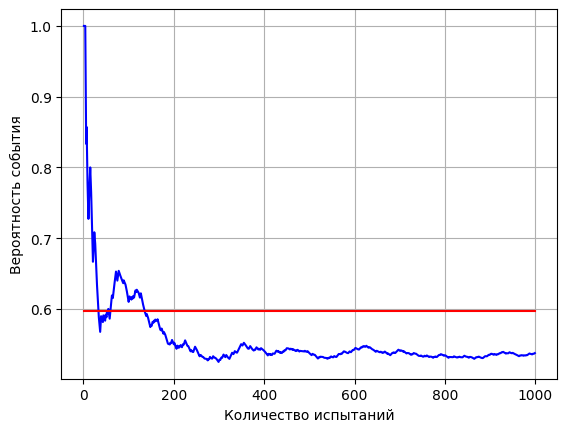

In [273]:
def plot_(x, y):
    plt.plot(x, y, color = 'b')
    plt.xlabel('Количество испытаний')
    plt.ylabel('Вероятность события')
    plt.grid()
    plt.plot(x, [P_4] * len(x), color = 'r')
    plt.show()


plot_(x, y)